In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [2]:
# Loading the data

df = pd.read_csv(r'C:\Users\USER\A VS CODE\Customer_Segmentation_project\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df = df.iloc[:, [3, 4]].values

In [4]:
df[:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]])

In [5]:
# Checking the shape and for any NaNs or infinite values
print("Data shape:", df.shape)
print("Number of NaNs:", np.isnan(df).sum())
print("Number of infinite values:", np.isinf(df).sum())

Data shape: (200, 2)
Number of NaNs: 0
Number of infinite values: 0


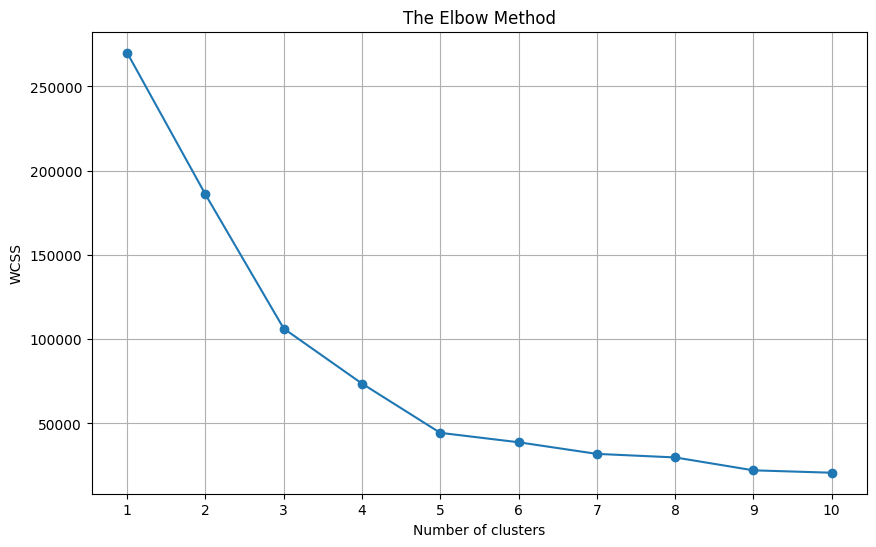

In [6]:
# Elbow method using WCSS
wcss = []
k_range = range(1, 11)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(k_range)  # Set x-ticks to the k_range
plt.grid()
plt.show()

In [7]:
print("WCSS values:", wcss)

WCSS values: [269981.28, 185917.14253928524, 106348.37306211119, 73679.78903948836, 44448.45544793371, 38858.9599751439, 31969.426550235476, 29858.483597603947, 22209.851608025547, 20786.936692059156]


In [8]:
# Training the model
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df)

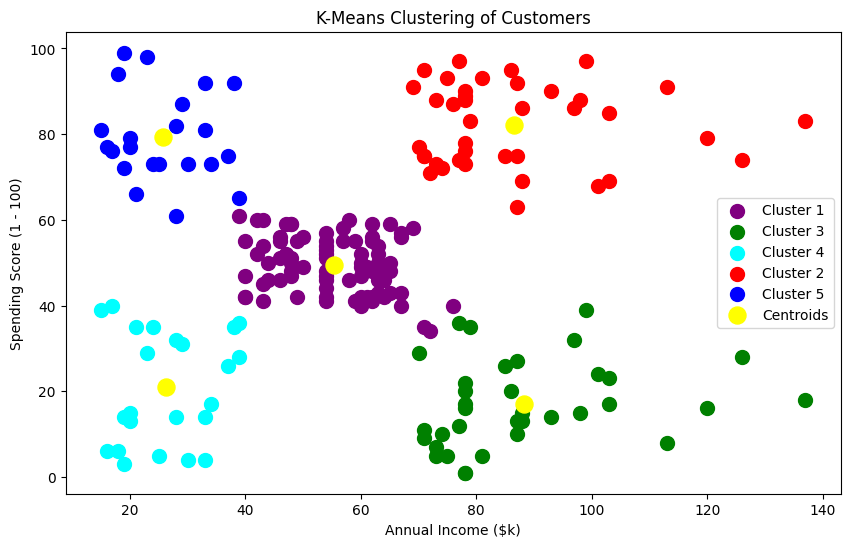

In [10]:
# Visualizing the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df[y_kmeans == 0, 0], df[y_kmeans == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(df[y_kmeans == 2, 0], df[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df[y_kmeans == 3, 0], df[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df[y_kmeans == 1, 0], df[y_kmeans == 1, 1], s=100, c='red', label='Cluster 2')
plt.scatter(df[y_kmeans == 4, 0], df[y_kmeans == 4, 1], s=100, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'yellow', label = 'Centroids')
plt.title('K-Means Clustering of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1 - 100)')
plt.legend()
plt.show()

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

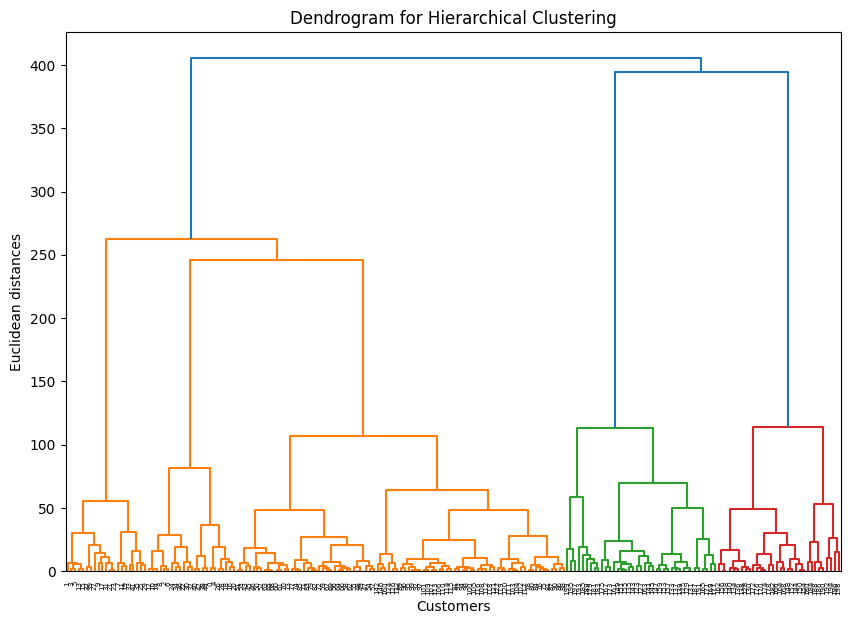

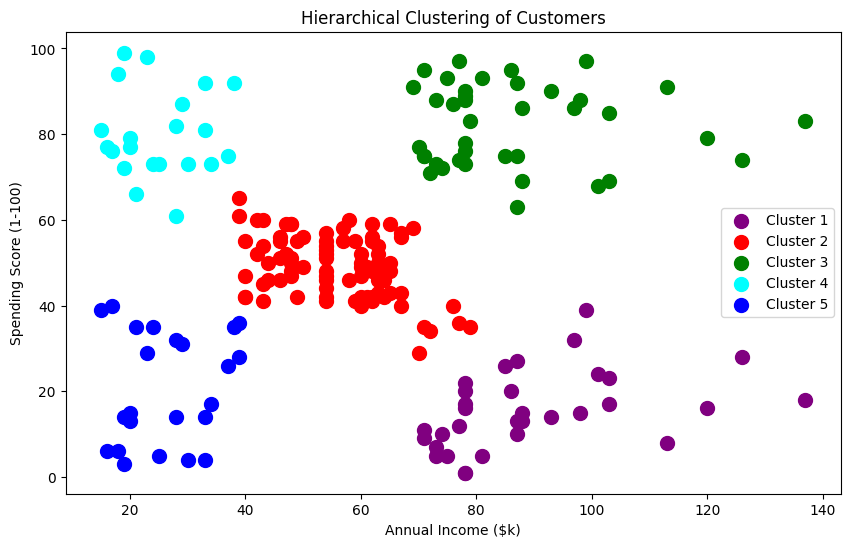

In [12]:
# Performing Hierarchical Clustering and plotting the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Hierarchical Clustering")
linked = linkage(df, method='ward')  # Using the Ward method for linkage
dendrogram(linked)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

# Applying Agglomerative Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, metric ='euclidean', linkage='ward')
y_hc = hierarchical_clustering.fit_predict(df)

# Visualizing the clusters from Hierarchical Clustering
plt.figure(figsize=(10, 6))
plt.scatter(df[y_hc == 0, 0], df[y_hc == 0, 1], s=100, c='purple', label='Cluster 1')
plt.scatter(df[y_hc == 1, 0], df[y_hc == 1, 1], s=100, c='red', label='Cluster 2')
plt.scatter(df[y_hc == 2, 0], df[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(df[y_hc == 3, 0], df[y_hc == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(df[y_hc == 4, 0], df[y_hc == 4, 1], s=100, c='blue', label='Cluster 5')

plt.title('Hierarchical Clustering of Customers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [1]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
